# Project Description

Operator telekomunikasi bernama Interconnect ingin meramalkan tingkat *churn* klien mereka.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀡󠀳󠀰 Jika diketahui bahwa seorang klien berencana untuk berhenti, klien tersebut akan ditawari kode promosi dan opsi paket khusus.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀢󠀳󠀰 Tim pemasaran Interconnect telah mengumpulkan beberapa data pribadi klien, termasuk informasi tentang paket data yang dipilih dan kontrak mereka.

### Layanan Interconnect

󠀰Interconnect menyediakan dua jenis layanan utama:

1. Jaringan telepon rumah.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀦󠀳󠀰 Telepon bisa disambungkan ke beberapa saluran secara bersamaan.
2. Internet.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀨󠀳󠀰 Jaringan internet dapat diatur melalui saluran telepon (DSL, *digital subscriber line*) atau melalui kabel serat optik.

󠀰Beberapa layanan lain yang disediakan Interconnect meliputi:

- Keamanan Internet: perangkat lunak antivirus (*DeviceProtection*) dan pemblokir situs web berbahaya (*OnlineSecurity*)
- Jalur dukungan teknis khusus (*TechSupport*)
- Penyimpanan *cloud* untuk *file* dan *backup* data (*OnlineBackup*)
- *Streaming* TV (*StreamingTV*) dan direktori film (*StreamingMovies*)

Klien dapat memilih untuk melakukan pembayaran secara bulanan atau menandatangani kontrak untuk berlangganan selama 1 atau 2 tahun.󠀲󠀡󠀠󠀥󠀨󠀣󠀥󠀥󠀳󠀰 Mereka bisa menggunakan beragam metode pembayaran dan menerima tagihan elektronik setelah melakukan transaksi.

### Deskripsi Data

󠀰Data yang tersedia terdiri dari beberapa *file* yang didapat dari sumber berbeda:

- `contract.csv` — 󠀰informasi kontrak
- `personal.csv` — 󠀰data personal klien
- `internet.csv` — informasi tentang layanan Internet
- `phone.csv` — informasi tentang layanan telepon

Pada setiap *file*, Anda bisa menemukan kolom `customerID` dengan kode unik yang ditetapkan untuk setiap klien.

Informasi kontrak berlaku per tanggal 1 Februari 2020.

Fitur target: Kolom `'EndDate'` sama dengan `'No'`.

Metrik utama: AUC-ROC.

Metrik tambahan: *Accuracy*.

Kriteria penilaian:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

# Project Plan

**Review Kebutuhan**
- Mereview kebutuhan proyek
- Mengidentifikasi jenis model yang diperlukan (klasifikasi atau regresi)
    - Melabeli data dengan fitur dan label yang tersedia
    - Mengklasifikasi model untuk supervised learning
- Membuat catatan metrik yang diperlukan

**Persiapan Data**
- Mendownload file datanya
- Setup impor library
- Impor data
- Prapemrosesan data
    - Memeriksa data yang terduplikasi, nilai yang hilang (missing value)
    - Menggabungkan tabel data
    - Mengubah tipe data dan data di kolom
    - Mengidentifikasi nilai NaN setelah menggabungkan tabel
    - Mengidentifikasi tindakan pada nilai NaN
    
**Analisis Data**
- Exploratory Data Analysis (EDA)
- Analisis data statistik

**Evaluasi Model**
- Feature Engineering
    - Mengevaluasi dan mengindentifikasi fitur yang dibutuhkan
    - Memisahkan fitur ke dalam dataset Training, test, dan validasi
- Mengecek ketidakseimbangan dan apabila diperlukan Upsampling atau Downsampling
- Evaluasi model
    - Menggunakan set Training dan Validasi
    - Membuat daftar model klasifikasi yang akan digunakan
    - Menyesuaikan Hyperparameter untuk meningkatkan performa model
    - Mengevaluasi Metrik AUC-ROC dan Accuracy
    - Mengidentifikasi Top model

**Pengujian Model**
- Menghitung metrik pada prediksi dan aktual
- Finalisasi model terbaik

**Review Feedback dan Improvisasi**

## Import Library, Set Variabel Global

In [1]:
# import all libraries
!pip install scikit-plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
%matplotlib inline
import time
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from datetime import date
import sys

import warnings
warnings.filterwarnings('ignore')

import scikitplot as skplt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Import Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.utils import shuffle

print (sys.version)

Target = 'contractcancelled'
pd.set_option('display.max_colwidth', -1)
Scoring = 'roc_auc'

3.9.5 | packaged by conda-forge | (default, Jun 19 2021, 00:32:32) 
[GCC 9.3.0]


## 1. Data Preparation

### 1.1 Pengunduhan Data

In [2]:
# data downloading

path = '/datasets/final_provider/'
path1 = path + 'contract.csv'
path2 = path + 'internet.csv'
path3 = path + 'personal.csv'
path4 = path + 'phone.csv'

df_contract = pd.read_csv(path1, sep=',', parse_dates=['BeginDate'])
df_internet = pd.read_csv(path2, sep=',')
df_personal = pd.read_csv(path3, sep=',')
df_phone = pd.read_csv(path4, sep=',')

### 1.2 Pra-Pemrosesan Data

In [3]:
# membuat fungsi pengolahan data

def display_information(df):
    print('Head:')
    display(df.head())
    print ('-'*100)
    print('Tail:')
    display(df.tail())
    print ('-'*100)
    print('Info:')
    print()
    display(df.info())
    print ('-'*100)
    print('Describe:')
    display(df.describe())
    print ('-'*100)
    print('Skew Factor:')
    display(df.skew())
    print ('-'*100)
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    print ('-'*100)
    print('Shape:')
    print(df.shape)
    print ('-'*100)
    print('Duplicated:')
    print('Duplicate rows:',df.duplicated().sum(),', Duplicate percentage:', (df.duplicated().sum()*100) / df.shape[0],'%')
    
def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

In [4]:
# contract

display_information(df_contract)
print('-'*100)

Head:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


----------------------------------------------------------------------------------------------------
Tail:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

----------------------------------------------------------------------------------------------------
Describe:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


----------------------------------------------------------------------------------------------------
Skew Factor:


MonthlyCharges   -0.220524
dtype: float64

----------------------------------------------------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
BeginDate,0,0.0
EndDate,0,0.0
Type,0,0.0
PaperlessBilling,0,0.0
PaymentMethod,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(7043, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
----------------------------------------------------------------------------------------------------


In [5]:
# internet

display_information(df_internet)
print('-'*100)

Head:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Tail:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

----------------------------------------------------------------------------------------------------
Describe:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,9600-UDOPK,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


----------------------------------------------------------------------------------------------------
Skew Factor:


Series([], dtype: float64)

----------------------------------------------------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0
DeviceProtection,0,0.0
TechSupport,0,0.0
StreamingTV,0,0.0
StreamingMovies,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(5517, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
----------------------------------------------------------------------------------------------------


In [6]:
# personal

display_information(df_personal)
print('-'*100)

Head:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------------------------------------------------------------------------------
Tail:


,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

----------------------------------------------------------------------------------------------------
Describe:


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


----------------------------------------------------------------------------------------------------
Skew Factor:


SeniorCitizen    1.833633
dtype: float64

----------------------------------------------------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(7043, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
----------------------------------------------------------------------------------------------------


In [7]:
# phone

display_information(df_phone)
print('-'*100)

Head:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------------------------------------------------------------------------------
Tail:


,customerID,MultipleLines
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

----------------------------------------------------------------------------------------------------
Describe:


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,9600-UDOPK,No
freq,1,3390


----------------------------------------------------------------------------------------------------
Skew Factor:


Series([], dtype: float64)

----------------------------------------------------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
MultipleLines,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(6361, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
----------------------------------------------------------------------------------------------------


In [8]:
# mengecek ukuran dari setiap dataset

print("Ukuran setiap Dataset")
num_contract = df_contract.shape[0]
num_internet = df_internet.shape[0]
num_personal = df_personal.shape[0]
num_phone = df_phone.shape[0]

print('Contract:', num_contract,
      'Internet:', num_internet,
      'Personal:', num_personal,
      'Phone:', num_phone)
print('-'*100)
print("Klien yang hilang berdasarkan record Internet atau Phone")

num_missing_internet = num_contract - num_internet
num_missing_phone = num_contract - num_phone

print('Record Internet yang hilang', num_missing_internet, round(num_missing_internet*100/num_contract, 2),'%')
print('Record Phone yang hilang', num_missing_phone, round(num_missing_phone*100/num_contract, 2),'%')

Ukuran setiap Dataset
Contract: 7043 Internet: 5517 Personal: 7043 Phone: 6361
----------------------------------------------------------------------------------------------------
Klien yang hilang berdasarkan record Internet atau Phone
Record Internet yang hilang 1526 21.67 %
Record Phone yang hilang 682 9.68 %


**Kesimpulan**

* Tidak ada duplikat, dan tidak ada nilai 
nol di dataset mana pun.
* Dataset `Contract` memiliki 7043 record. `Internet` dan `Phone` memiliki lebih sedikit record.
* 9,68% record `Phone` hilang.
* 21,67% record `Internet` hilang.
* Hal di atas menyiratkan bahwa ada klien yang mungkin hanya memiliki layanan `Internet` atau `Phone`, atau informasi tersebut tidak tersedia.
* Selanjutnya semua record akan digabungkan menggunakan key `Customer_id`, dan semua NaN perlu diisi.

In [9]:
# ganti nama semua kolom ke lowercase (jadikan semua huruf kecil).

for i in [df_contract,df_internet,df_personal,df_phone]:
    i.columns = i.columns.str.strip().str.lower()

### 1.3 Penggabungan Record

In [10]:
df_all = df_contract.set_index('customerid').join([df_internet.set_index('customerid'),df_personal.set_index('customerid'),df_phone.set_index('customerid')],how='left').reset_index()
display(df_all.shape)
display(df_all.head(5))

(7043, 20)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [11]:
# combined data result

display_information(df_all)
print('-'*100)

Head:


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


----------------------------------------------------------------------------------------------------
Tail:


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Male,0,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   object        
 8   internetservice   5517 non-null   object        
 9   onlinesecurity    5517 non-null   object        
 10  onlinebackup      5517 non-null   object        
 11  deviceprotection  5517 non-null   object        
 12  techsupport       5517 n

None

----------------------------------------------------------------------------------------------------
Describe:


,monthlycharges,seniorcitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


----------------------------------------------------------------------------------------------------
Skew Factor:


monthlycharges   -0.220524
seniorcitizen     1.833633
dtype: float64

----------------------------------------------------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls
customerid,0,0.00
begindate,0,0.00
enddate,0,0.00
type,0,0.00
paperlessbilling,0,0.00
paymentmethod,0,0.00
monthlycharges,0,0.00
totalcharges,0,0.00
internetservice,1526,21.67
onlinesecurity,1526,21.67


----------------------------------------------------------------------------------------------------
Shape:
(7043, 20)
----------------------------------------------------------------------------------------------------
Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
----------------------------------------------------------------------------------------------------


### 1.4 Penanganan kolom NaN

In [12]:
df_all['contractcancelled']=np.where(df_all[['enddate']]=='No',0, 1)

values={
    'internetservice':'NA',
    'onlinesecurity':'NA',
    'onlinebackup':'NA',
    'deviceprotection':'NA',
    'techsupport':'NA',
    'streamingtv':'NA',
    'streamingmovies':'NA',
    'multiplelines':'NA'
    }

df_all = df_all.fillna(value=values)
df_all['monthlycharges'] = df_all['monthlycharges'].astype(float)
df_all['totalcharges'] = pd.to_numeric(df_all['totalcharges']. str.replace(" ",'0'),errors='raise')
#startdate = df_all['begindate']
df_all['target1'] = np.where(df_all[['enddate']]=='No',pd.to_datetime('2020-02-01'),df_all[['enddate']])
df_all['target2'] = pd.to_datetime(df_all['target1'],format='%y%m%d')
df_all['days'] = (df_all['target2']-df_all['begindate']).dt.days

display(df_all.info())
display(df_all.head(5))

df = df_all.copy(deep=True)

dropcolumns = ['enddate','begindate','customerid','target1','target2']
df.drop(dropcolumns,axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         7043 non-null   object        
 1   begindate          7043 non-null   datetime64[ns]
 2   enddate            7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperlessbilling   7043 non-null   object        
 5   paymentmethod      7043 non-null   object        
 6   monthlycharges     7043 non-null   float64       
 7   totalcharges       7043 non-null   float64       
 8   internetservice    7043 non-null   object        
 9   onlinesecurity     7043 non-null   object        
 10  onlinebackup       7043 non-null   object        
 11  deviceprotection   7043 non-null   object        
 12  techsupport        7043 non-null   object        
 13  streamingtv        7043 non-null   object        
 14  streamin

None

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,...,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines,contractcancelled,target1,target2,days
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,Female,0,Yes,No,NA,0,2020-02-01,2020-02-01,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,Male,0,No,No,No,0,2020-02-01,2020-02-01,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,Male,0,No,No,No,1,2019-12-01,2019-12-01,61
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,No,Male,0,No,No,NA,0,2020-02-01,2020-02-01,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,Female,0,No,No,No,1,2019-11-01,2019-11-01,61


In [13]:
display_information(df)

Head:


,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines,contractcancelled,days
0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NA,0,31
1,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,0,1036
2,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,1,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NA,0,1371
4,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,1,61


----------------------------------------------------------------------------------------------------
Tail:


,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines,contractcancelled,days
7038,One year,Yes,Mailed check,84.80,1990.50,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes,0,730
7039,One year,Yes,Credit card (automatic),103.20,7362.90,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes,0,2191
7040,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NA,0,337
7041,Month-to-month,Yes,Mailed check,74.40,306.60,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes,1,123
7042,Two year,Yes,Bank transfer (automatic),105.65,6844.50,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Male,0,No,No,No,0,2010


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperlessbilling   7043 non-null   object 
 2   paymentmethod      7043 non-null   object 
 3   monthlycharges     7043 non-null   float64
 4   totalcharges       7043 non-null   float64
 5   internetservice    7043 non-null   object 
 6   onlinesecurity     7043 non-null   object 
 7   onlinebackup       7043 non-null   object 
 8   deviceprotection   7043 non-null   object 
 9   techsupport        7043 non-null   object 
 10  streamingtv        7043 non-null   object 
 11  streamingmovies    7043 non-null   object 
 12  gender             7043 non-null   object 
 13  seniorcitizen      7043 non-null   int64  
 14  partner     

None

----------------------------------------------------------------------------------------------------
Describe:


,monthlycharges,totalcharges,seniorcitizen,contractcancelled,days
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.162147,0.265370,985.996166
std,30.090047,2266.794470,0.368612,0.441561,747.587844
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,0.000000,273.000000
50%,70.350000,1394.550000,0.000000,0.000000,883.000000
75%,89.850000,3786.600000,0.000000,1.000000,1676.000000
max,118.750000,8684.800000,1.000000,1.000000,2191.000000


----------------------------------------------------------------------------------------------------
Skew Factor:


monthlycharges      -0.220524
totalcharges         0.963235
seniorcitizen        1.833633
contractcancelled    1.063031
days                 0.239493
dtype: float64

----------------------------------------------------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls
type,0,0.0
paperlessbilling,0,0.0
paymentmethod,0,0.0
monthlycharges,0,0.0
totalcharges,0,0.0
internetservice,0,0.0
onlinesecurity,0,0.0
onlinebackup,0,0.0
deviceprotection,0,0.0
techsupport,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(7043, 19)
----------------------------------------------------------------------------------------------------
Duplicated:
Duplicate rows: 18 , Duplicate percentage: 0.2555729092716172 %


## 2. Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,monthlycharges,totalcharges,seniorcitizen,contractcancelled,days
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.162147,0.265370,985.996166
std,30.090047,2266.794470,0.368612,0.441561,747.587844
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,0.000000,273.000000
50%,70.350000,1394.550000,0.000000,0.000000,883.000000
75%,89.850000,3786.600000,0.000000,1.000000,1676.000000
max,118.750000,8684.800000,1.000000,1.000000,2191.000000


Berdasarkan gambaran di atas menunjukkan dispersi tagihan (charges), akan dilakukan pengecekan outliers menggunakan boxplot.

### 2.1 Boxplot

Boxplot: monthlycharges


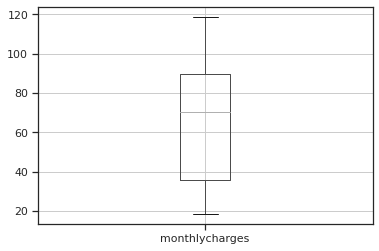

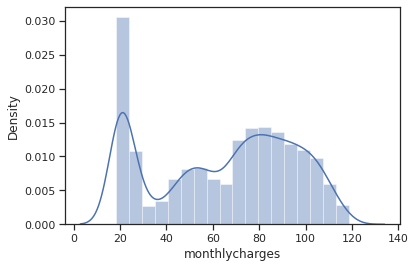

In [15]:
# boxplot untuk menampilkan nilai di atas atau di bawah rentang interkuartil

boxplotlist = ['monthlycharges','totalcharges','days']
item = boxplotlist[0]
print('Boxplot:', item)
df[[item]].boxplot();
plt.show()
ax = sns.distplot(df[[item]],axlabel = item)
plt.show()

- monthlycharges memiliki median lebih tinggi dari rata-rata.
- Data miring ke kiri (kemiringan negatif), mungkin disebabkan kebanyakan klien memiliki paket bulanan dengan biaya terendah sehingga data menjadi miring ke kiri.

Boxplot: totalcharges


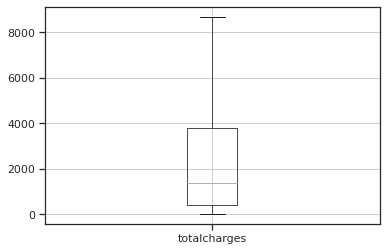

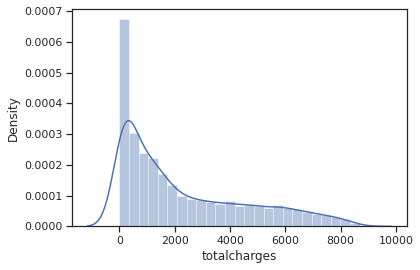

In [16]:
item = boxplotlist[1]
print('Boxplot:', item)
df[[item]].boxplot();
plt.show()
ax = sns.distplot(df[[item]],axlabel = item)
plt.show()

- totalcharges memiliki median lebih rendah dari rata-rata.
- Data miring ke kanan (kemiringan positif), mungkin disebabkan kebanyakan orang memiliki paket bulanan dengan biaya rendah, tetapi mereka sudah lama berlangganan sehingga total tagihan menjadi lebih tinggi.
- Inilah klien yang harus dimanfaatkan dengan menawarkan promosi atau opsi paket khusus kepada mereka.

Boxplot: days


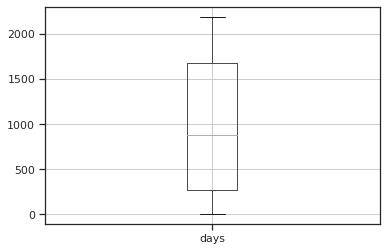

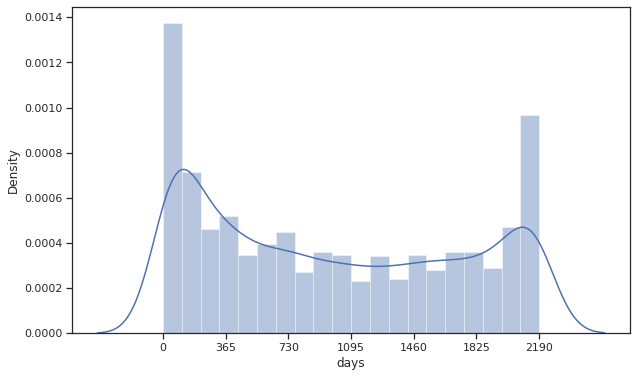

In [17]:
item = boxplotlist[2]
print('Boxplot:', item)
df[[item]].boxplot();
plt.show()
plt.figure(figsize=(10,6))
ax = sns.distplot(df[[item]],bins=20,axlabel=item)
lab = np.arange(0,df[item].max()+1, 365)
ax.set(xticks=lab, xticklabels=lab)
plt.show()

**Kesimpulan**
- Median untuk days hampir sama dengan rata-rata.
- Diagram Distribusi di atas menunjukkan puncak pengguna yang tinggi sekitaran 100 hari, 400 hari, dan 2000 hari.
- Kebanyakan klien berhenti pada tahun pertama atau menjelang akhir setiap tahun.
- Kontrak dengan provider mungkin untuk 1 atau 2 tahun, setelah itu akan berhenti berlangganan, dan klien lain melanjutkan.
- Fokusnya harus pada mempertahankan pelanggan yang baru saja bergabung atau dalam 2 tahun pertama kontrak.

In [18]:
# membandingkan distribusi [monthlycharges] dari semua klien (klien aktif & klien yang telah keluar) 

df_active = df[df[Target]==1]['monthlycharges']
df_left = df[df[Target]==0]['monthlycharges']

df_client = [df_active,df_left]
list_client = ['active clients','clients left']

display(df_active.head(5),df_left.head(5))

2     53.85 
4     70.70 
5     99.65 
8     104.80
13    103.70
Name: monthlycharges, dtype: float64

0    29.85
1    56.95
3    42.30
6    89.10
7    29.75
Name: monthlycharges, dtype: float64

Distribusi monthlycharges active clients


count    1869.000000
mean     74.441332  
std      24.666053  
min      18.850000  
25%      56.150000  
50%      79.650000  
75%      94.200000  
max      118.350000 
Name: monthlycharges, dtype: float64

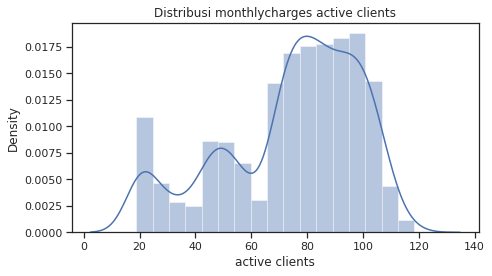

----------------------------------------------------------------------------------------------------
Distribusi monthlycharges clients left


count    5174.000000
mean     61.265124  
std      31.092648  
min      18.250000  
25%      25.100000  
50%      64.425000  
75%      88.400000  
max      118.750000 
Name: monthlycharges, dtype: float64

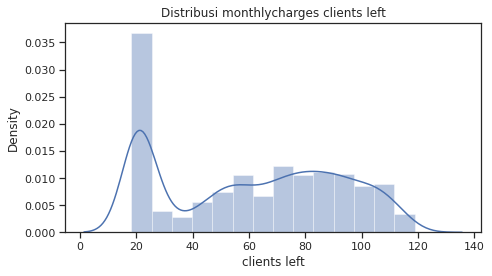

----------------------------------------------------------------------------------------------------


In [19]:
for i in range(2):
  print('Distribusi monthlycharges ' + list_client[i])
  display(df_client[i].describe())
  plt.figure(figsize=(7,4),tight_layout=True)
  plt.title('Distribusi monthlycharges ' + list_client[i])
  ax=sns.distplot(df_client[i], axlabel=list_client[i]);
  plt.show()
  print('-'*100)

In [20]:
# encode fitur kategorikal

dfE = pd.get_dummies(df,drop_first=True)
display(dfE.head())

,monthlycharges,totalcharges,seniorcitizen,contractcancelled,days,type_One year,type_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,...,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,gender_Male,partner_Yes,dependents_Yes,multiplelines_No,multiplelines_Yes
0,29.85,29.85,0,0,31,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
1,56.95,1889.50,0,0,1036,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,53.85,108.15,0,1,61,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3,42.30,1840.75,0,0,1371,1,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
4,70.70,151.65,0,1,61,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0


In [21]:
display(abs(dfE.corr()[['contractcancelled']]).sort_values(by='contractcancelled', ascending=False))

,contractcancelled
contractcancelled,1.000000
days,0.352673
onlinesecurity_No,0.342637
techsupport_No,0.337281
internetservice_Fiber optic,0.308020
type_Two year,0.302253
paymentmethod_Electronic check,0.301919
onlinebackup_No,0.268005
deviceprotection_No,0.252481
internetservice_NA,0.227890


[Text(0.5, 1.0, 'Hubungan antara contractcancelled dengan berbagai faktor'),
 Text(0, 0.5, 'contractcancelled')]

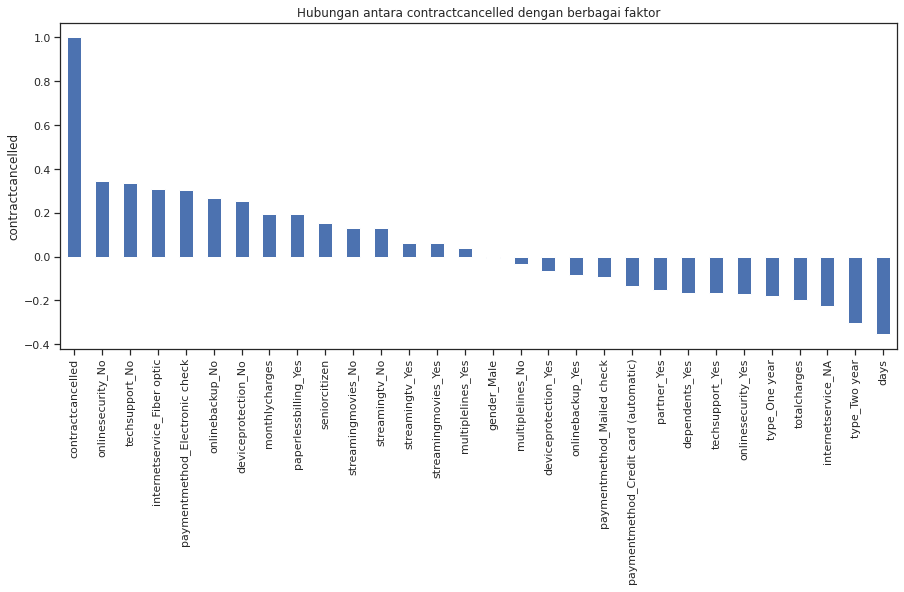

In [22]:
# Barchart correlation antar variabel dengan target variabel

plt.figure(figsize=(15,6))
ax = dfE.corr()[Target].sort_values (ascending=False).plot(kind='bar')
ax.set(title="Hubungan antara " + Target + " dengan berbagai faktor", ylabel = Target)

**Kesimpulan**

Barchart di atas menggambarkan bahwa contractcancelled (Target variabel):
- Dipengaruhi secara positif oleh monthlycharges, jenis internetservice, paperlessbilling, dan seniorcitizen.
- Dipengaruhi secara negatif oleh days, jenis contract, totalcharges, onlinesecurity, techsupport, dan dependents. Ini menandakan bahwa semakin banyak jumlah hari, semakin kecil kemungkinan orang meninggalkan kontrak.
- Sebagian besar pengaruh berbanding terbalik untuk days, type

In [23]:
dflistcol = abs(dfE.corr()[[Target]]).sort_values(by=Target,ascending=False)
listremovecols = (dflistcol[dflistcol.contractcancelled < 0.19].index)
print(listremovecols)

Index(['type_One year', 'onlinesecurity_Yes', 'techsupport_Yes',
       'dependents_Yes', 'seniorcitizen', 'partner_Yes',
       'paymentmethod_Credit card (automatic)', 'streamingmovies_No',
       'streamingtv_No', 'paymentmethod_Mailed check', 'onlinebackup_Yes',
       'deviceprotection_Yes', 'streamingtv_Yes', 'streamingmovies_Yes',
       'multiplelines_Yes', 'multiplelines_No', 'gender_Male'],
      dtype='object')


**Fitur dengan korelasi rendah**
- Terdapat kolom yang korelasinya sangat rendah dengan target (contractcancelled)
- Akan dilakukan pemeriksaan ketergantungan fitur (feature dependencies) untuk setiap model dan melhat fitur mana yang paling mempengaruhi keputusan model.

### 2.2 Check Data Balance

target positif: 1869 target negatif: 5174 rasio target: 2.77


<AxesSubplot:ylabel='Frequency'>

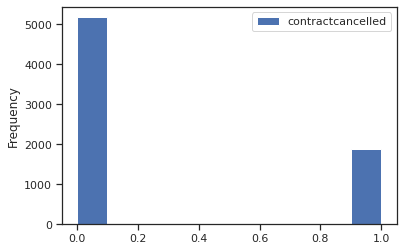

In [24]:
# mengecek keseimbangan data

targetpositif = (dfE[Target]==1).sum()
targetnegatif = (dfE[Target]==0).sum()
rasiotarget = targetnegatif/targetpositif
print("target positif:", targetpositif,
      "target negatif:", targetnegatif,
      "rasio target:", round(rasiotarget, 2))
dfE[[Target]].plot.hist()

**Kesimpulan**
- Data sangat tidak seimbang
- Target positif di mana orang telah memutuskan kontrak sebanyak 1869
- Target negatif di mana orang-orang masih memiliki kontrak sebanyak 5174
- Ini menunjukkan bahwa record target negatif adalah 2,77 kali record target positif, Hal ini dapat mengakibatkan bias Training.
- Selanjutnya meningkatkan Training set setelah Test set dibuat, dan hanya Training set yang akan di upampling sehingga tidak ada kebocoran target.

### 2.3 Feature Engineering

In [25]:
# feature engineering

featuresEn =  dfE.drop(Target, axis=1)
targetEn = dfE[Target]

In [26]:
# split Training into Training (75%) dan Test validasi (25%)

features_train, features_test, target_train, target_test = train_test_split(featuresEn, targetEn, test_size=0.25, random_state=12345)

numeric = ['totalcharges', 'monthlycharges']

# standardsize the numerical features
scaler = StandardScaler()

# transform feature set
scaler.fit(features_train[numeric])
features_train.loc[:,numeric] = scaler.transform(features_train[numeric])

# transform test set
features_test.loc[:,numeric] = scaler.transform(features_test[numeric])

totalsize = len(dfE)

print('training set: {0:.0%}'.format(len(features_train)/totalsize),features_train.shape,',training target: ',target_train.shape)
print('test set: {0:.0%}'.format(len(features_test)/totalsize),features_test.shape,',test target: ',target_test.shape)

training set: 75% (5282, 29) ,training target:  (5282,)
test set: 25% (1761, 29) ,test target:  (1761,)


In [27]:
# upsampling training set

features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(3887, 29)
(1395, 29)
(3887,)
(1395,)


(8072, 29)
(8072,)


<AxesSubplot:ylabel='Frequency'>

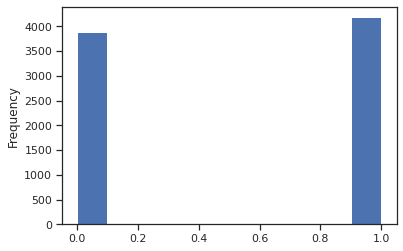

In [28]:
# membuat upsample

repeat = 3
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
print(features_upsampled.shape)
print(target_upsampled.shape)
features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
target_upsampled.plot.hist()

In [29]:
features_train = features_upsampled
target_train = target_upsampled
print(Counter(target_train),features_train.shape,target_train.shape)

Counter({1: 4185, 0: 3887}) (8072, 29) (8072,)


**Kesimpulan**
- Upsampling yang dilakukan pada set Training terlihat jauh lebih seimbang.
- Lebih banyak fitur ada di target positif sekarang.
- Tidak terdapat kebocoran karena hanya meng-upampling set Training.
- Membuat set Test sebelum meningkatkan set Training.

### 2.4 Membuat Result Dataframe

In [30]:
df_prediction = pd.DataFrame()
df_prediction['actual'] = target_test

In [31]:
# membuat dataframe 

column_names = ["Classification Model Name",'test AUC-ROC','test Accuracy','test_F1']
df_results = pd.DataFrame(columns = column_names)
display(df_results)

,Classification Model Name,test AUC-ROC,test Accuracy,test_F1


In [32]:
def update_results(model_name,testAUCROC,testAccuracy,testF1):
    global df_results
    
    result_row_str = [model_name,testAUCROC,testAccuracy,testF1]
    rows = [pd.Series(result_row_str, index=df_results.columns)]

    df_results = df_results.append(rows,ignore_index=True)
    
    display(df_results.tail(1))

## 3. Evaluasi Model

In [33]:
def round3(num):
    return(round(num,3))

def aucroc_scorer(target, predicted, predicted_proba):
    
    aucrocscore = round3(roc_auc_score(target, predicted_proba[:,1]))
    accuracyscore = round3(accuracy_score(target, predicted, normalize=True))
    f1score = round3(f1_score(target, predicted))
    
    return(aucrocscore, accuracyscore, f1score)

In [34]:
def evaluate_model(model1,features_train1,target_train1,features_test1,target_test1,featureImportance,modelname):
    global df_prediction
    
    cv = KFold(n_splits=10, random_state=12345, shuffle=True)
    scores = cross_val_score(model1, features_train1, target_train1, scoring=Scoring, cv=cv, n_jobs=-1)
    scores = np.abs(scores)
    print('Train Kfold Mean ROC-AUC:', round3(scores.mean()))

    model1.fit(features_train1, target_train1)
    predicted_test = model1.predict(features_test1)
    predicted_proba = model1.predict_proba(features_test1)
      
    fig, axs = plt.subplots(1, 3, figsize=(20, 5)) 

    ax = axs[0]
    if (featureImportance==1):
        fim = model1.feature_importances_
    elif (featureImportance==0):
        fim = model1.coef_[0]
    else:
        fim = 0
    if (featureImportance != -1):
        imp = pd.Series(fim, index=features_train1.columns).sort_values(ascending=False)
        sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h',ax=ax)

    ax = axs[1]
    skplt.metrics.plot_roc(target_test1, predicted_proba,title='ROC Curve for Test',ax=ax)
    
    ax  = axs[2]
    skplt.metrics.plot_confusion_matrix(target_test1, predicted_test,title='Confusion Matrix for Test',ax=ax)

    df_prediction[modelname] = predicted_test
    testAUCROC,testAccuracy,testF1 = aucroc_scorer(target_test1, predicted_test, predicted_proba) 

    update_results(modelname,testAUCROC,testAccuracy,testF1)
    return

## 4. Train Model
- Dummy Classifier
- LogisticRegression
- LGBMClassifier (GridSearchCV)
- XGBRegressor
- CatBoostClassifier
- AdaBoost DecisionTree
- RandomForestClassifier
- Artificial Neural Network (ANN)

### 4.1 Dummy Classifier

Train Kfold Mean ROC-AUC: 0.5


,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
0,Dummy Classifier,0.5,0.269,0.424


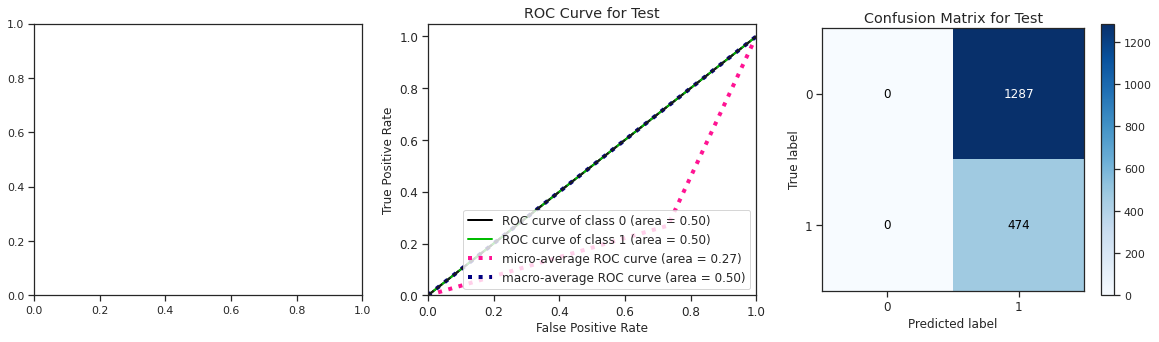

In [35]:
# DummyClassifier

modelname = 'Dummy Classifier'

model_0 = DummyClassifier(random_state=12345)
hyperparam = 'none'
featureImportance = -1

evaluate_model(model_0,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.2 LogisticRegression

Train Kfold Mean ROC-AUC: 0.849


,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
1,Logistic Regression,0.838,0.737,0.622


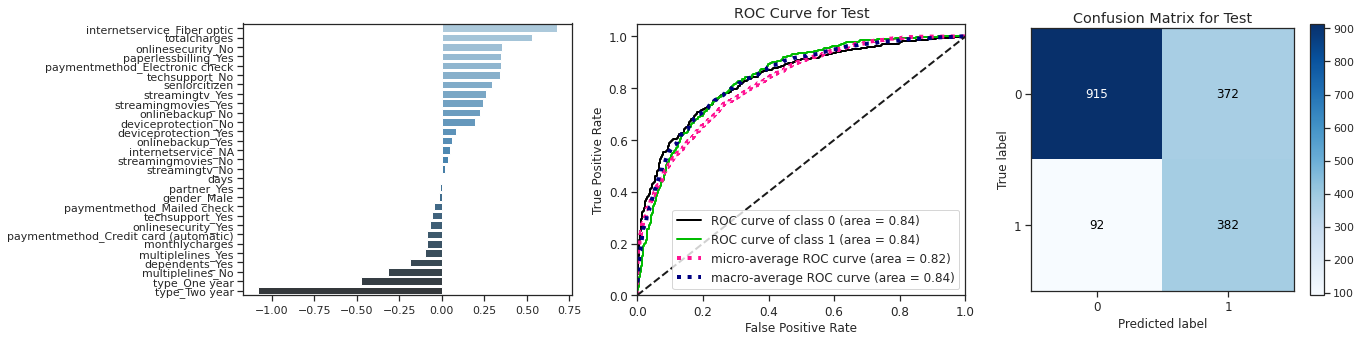

In [36]:
# LogisticRegression

modelname = "Logistic Regression"
hyperparam = "none"
model = LogisticRegression(random_state=12345, solver='liblinear')
featureImportance = 0

evaluate_model(model,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.3 LGBMClassifier (GridSearchCV)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [

,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
2,LGBM GridSearchCV,0.909,0.867,0.753


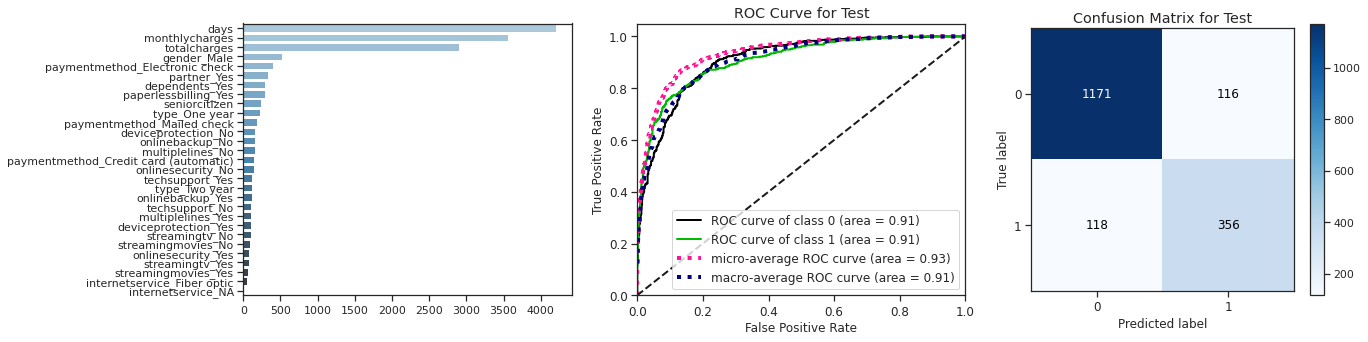

In [37]:
# LGBMClassifier

modelname = 'LGBM GridSearchCV'
featureImportance = 1

model = LGBMClassifier()
parameters = {'learning_rate' : [0.001,0.5,0.1],
              'n_estimators' : [10,20,50,1500],
              'eval_metric':[Scoring],
              'random_state' : [12345]}

grid = GridSearchCV(estimator= model, param_grid= parameters, scoring=Scoring, cv= 3, n_jobs=-1)
grid.fit(features_train, target_train)
best_param = grid.best_params_
score = round3(grid.best_score_)
print("\n The best score across all searched params:\n",
          score)
    
print("\n The best parameters across all searched params:\n",
          grid.best_params_)

model = LGBMClassifier(learning_rate = best_param['learning_rate'], 
                       n_estimators = 500,
                       eval_metric = Scoring,
                       random_state = 12345)

evaluate_model(model,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.4 XGBoost OneHotEncoding

Train Kfold Mean ROC-AUC: 0.978


,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
3,XGBClassifier,0.904,0.849,0.729


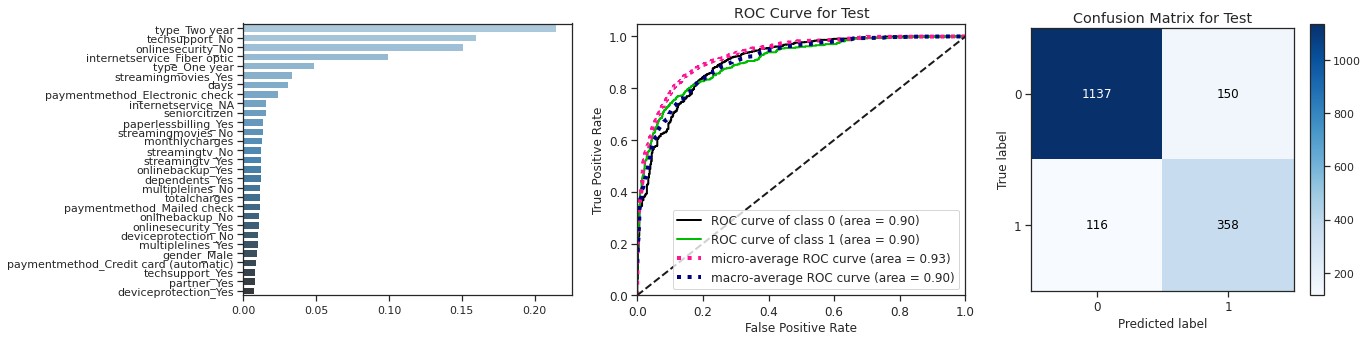

In [38]:
# XGBoost OneHotEncoding

modelname = 'XGBClassifier'
featureImportance = 1
model =  XGBClassifier(learning_rate= 0.03, eval_metric='auc', n_estimators= 1500, random_state=12345)
hyperparam = 'learning_rate = 0.03, eval_metric=auc, n_estimators = 1500'

evaluate_model(model,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.5 CatBoost Classifier

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0:	learn: 0.6746892	total: 86ms	remaining: 774ms
1:	learn: 0.6588884	total: 130ms	remaining: 519ms
2:	learn: 0.6432569	total: 165ms	remaining: 384ms
3:	learn: 0.6284503	total: 202ms	remaining: 302ms
4:	learn: 0.6145025	total: 233ms	remaining: 233ms
5:	learn: 0.6018227	total: 265ms	remaining: 176ms
6:	learn: 0.5881586	total: 296ms	remaining: 127ms
7:	learn: 0.5758923	total: 328ms	remaining: 82.1ms
8:	learn: 0.5644216	total: 360ms	remaining: 40ms
9:	learn: 0.5539082	total: 394ms	remaining: 0us
0:	learn: 0.6746736	total: 31.4ms	remaining: 283ms
1:	learn: 0.6590239	total: 63.3ms	remaining: 253ms
2:	learn: 0.6454982	total: 95ms	remaining: 222ms
3:	learn: 0.6314279	total: 127ms	remaining: 191ms
4:	learn: 0.6178867	total: 160ms	remaining: 160ms
5:	learn: 0.6060840	total: 193ms	remaining: 129ms
6:	learn: 0.5939786	total: 227ms	remaining: 97.3ms
7:	learn: 0.5820601	total: 259ms	remaining: 64.9ms
8:	learn: 0.5714647	total: 296ms	remai

,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
4,CatBoost Classifier,0.861,0.805,0.654


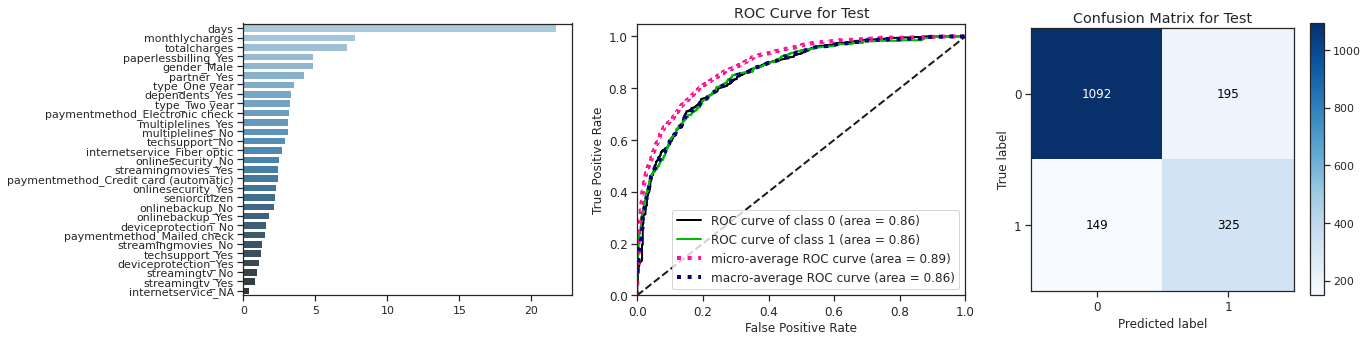

In [39]:
# CatBoostClassifier

modelname = 'CatBoost Classifier'
featureImportance = 1
model = CatBoostClassifier()
parameters = {'learning_rate': [0.03,0.1, 0.3],
              'depth': [10],'l2_leaf_reg': [3, 5, 7, 9],
              'iterations':[10,20,60],'random_state':[12345]}

grid = GridSearchCV(estimator=model, param_grid = parameters, scoring=Scoring, cv = 3, n_jobs=-1, verbose=1)

grid.fit(features_train, target_train)

best_param = grid.best_params_
score= round3(grid.best_score_)
print("\n The best score across all searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across all searched params:\n",
          grid.best_params_)

model = CatBoostClassifier(depth=best_param['depth'], learning_rate=best_param['learning_rate'],
                           l2_leaf_reg = best_param['l2_leaf_reg'], metric_period=50, eval_metric='AUC',
                           iterations=best_param['iterations'], random_state=12345)

evaluate_model(model,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.6 AdaBoost DecisionTree

Train Kfold Mean ROC-AUC: 0.986


,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
5,AdaBoost DecisionTree,0.904,0.863,0.735


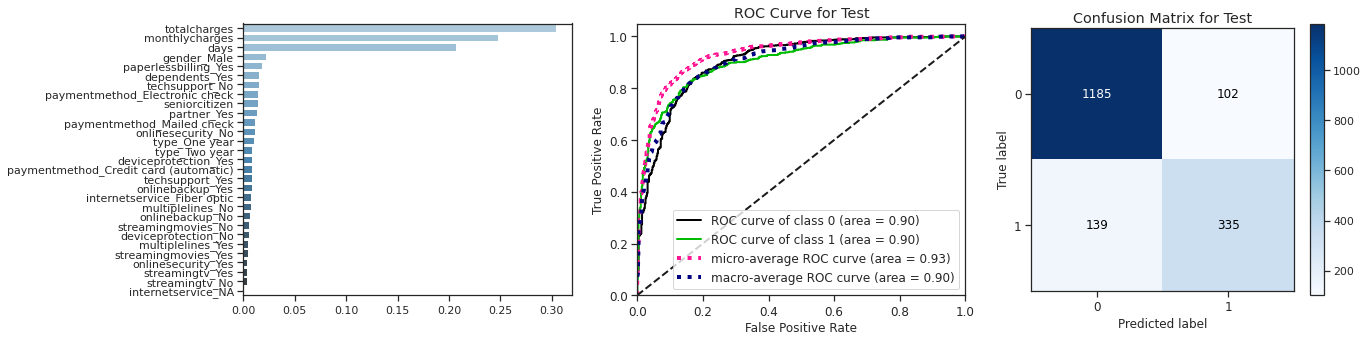

In [40]:
# AdaBoostDecisionTree

modelname = 'AdaBoost DecisionTree'
featureImportance = 1
hyperparam = 'min_samples_split=10,max_depth=4,class_weight=balanced'

dtc = DecisionTreeClassifier(min_samples_split=10,max_depth=4,class_weight='balanced',random_state=12345)
model = AdaBoostClassifier(dtc,n_estimators=500,learning_rate=0.07,random_state=12345)

evaluate_model(model,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.7 RandomForestClassifier

Train Kfold Mean ROC-AUC: 0.88


,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
6,RandomForest,0.854,0.758,0.64


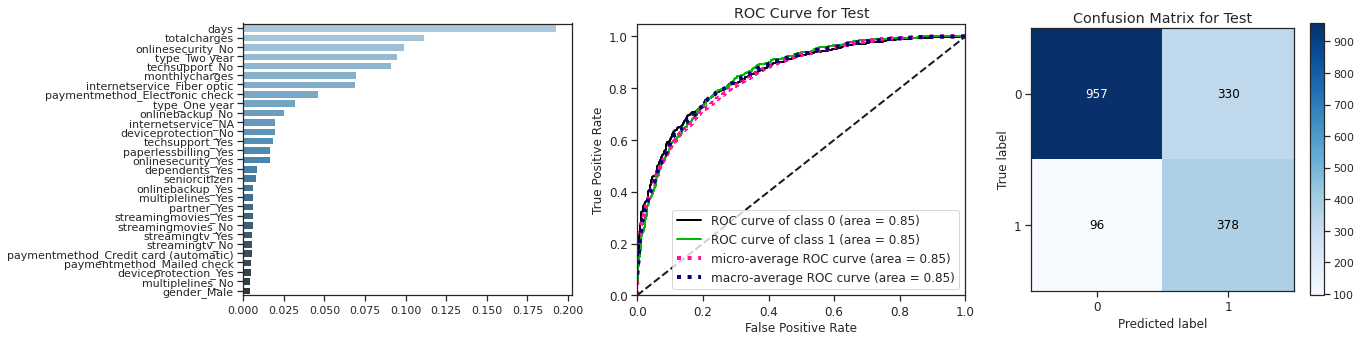

In [41]:
# RandomForestClassfier

modelname = 'RandomForest'
featureImportance = 1
hyperparam = 'min_samples_split=80,max_depth=100,n_estimators=250'
model = RandomForestClassifier(min_samples_split=80,max_depth=100,n_estimators=250,random_state=12345)

evaluate_model(model,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.8 KNeighborsClassifier (KNN)

Fitting 10 folds for each of 32 candidates, totalling 320 fits

 The best score across all searched params:
 0.9853426041982564

 The best parameters across all searched params:
 {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Train Kfold Mean ROC-AUC: 0.986


,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
7,KNeighbors Classifier,0.859,0.783,0.657


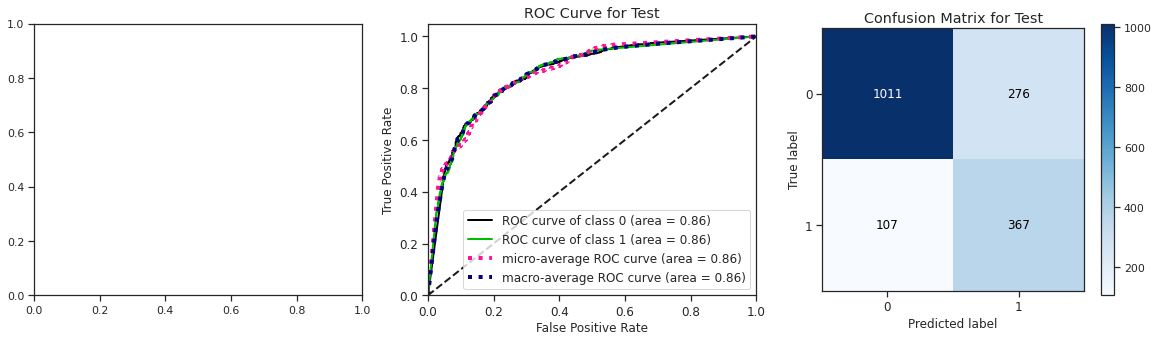

In [42]:
# KNeighborsClassifier

modelname = 'KNeighbors Classifier'
featureImportance = -1
model = KNeighborsClassifier()
parameters = {'n_neighbors': range(1, 9), 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(estimator=model, param_grid=parameters, scoring=Scoring, n_jobs=10, cv=10, verbose=True)

grid.fit(features_train, target_train)

best_param = grid.best_params_
score= round3(grid.best_score_)
print("\n The best score across all searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across all searched params:\n",
          grid.best_params_)

model = KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

evaluate_model(model,features_train,target_train,features_test,target_test,featureImportance,modelname)

### 4.9 Artificial Neural Network (ANN)

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(features_train.shape[1],)),
    keras.layers.Dense(256, activation=tf.nn.softmax),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC','accuracy'])

model.fit(features_train, target_train, epochs=10, batch_size=100,verbose=0)

modelname = 'KerasNN'
predicted = model.predict(features_test)
loss,testAUCROC,testAccuracy = model.evaluate(features_test, target_test)
testF1 = ''

df_prediction[modelname] = predicted
hyperparam = 'epochs=10'

update_results(modelname,round3(testAUCROC),round3(testAccuracy),testF1)

2023-06-23 17:15:59.321705: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


56/56 [==============================] - 0s 2ms/step - loss: 0.5175 - auc: 0.8376 - accuracy: 0.7411


,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
8,KerasNN,0.838,0.741,


## 5. Hasil Akhir

- Berikut ini adalah tampilan hasil akhir dari semua Model yang telah ditrain dan ditest.
- Model disusun berurutan dari Test AUC-ROC dan Akurasi.
- Model Terbaik (Test AUC-ROC dan Accuracy) ada di baris atas, dan model terburuk ada di baris bawah.

### 5.1 Model Result

In [44]:
df_results_sorted = df_results.sort_values(by=['test AUC-ROC'],ascending=False)
display(df_results_sorted)

,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
2,LGBM GridSearchCV,0.909,0.867,0.753
3,XGBClassifier,0.904,0.849,0.729
5,AdaBoost DecisionTree,0.904,0.863,0.735
4,CatBoost Classifier,0.861,0.805,0.654
7,KNeighbors Classifier,0.859,0.783,0.657
6,RandomForest,0.854,0.758,0.64
1,Logistic Regression,0.838,0.737,0.622
8,KerasNN,0.838,0.741,
0,Dummy Classifier,0.500,0.269,0.424


### 5.2 Model yang memiliki AUC-ROC ≥ 0,88

In [45]:
display(df_results_sorted[df_results_sorted['test AUC-ROC']>0.88])

,Classification Model Name,test AUC-ROC,test Accuracy,test_F1
2,LGBM GridSearchCV,0.909,0.867,0.753
3,XGBClassifier,0.904,0.849,0.729
5,AdaBoost DecisionTree,0.904,0.863,0.735


In [46]:
# Semua Prediksi disimpan dalam DataFrame dan ditampilkan.

display(df_prediction.head(5))

,actual,Dummy Classifier,Logistic Regression,LGBM GridSearchCV,XGBClassifier,CatBoost Classifier,AdaBoost DecisionTree,RandomForest,KNeighbors Classifier,KerasNN
1128,0,1,0,0,0,0,0,0,0,0.158163
2875,1,1,1,1,1,1,1,1,1,0.790329
1783,1,1,1,1,1,1,1,1,1,0.906469
3804,0,1,1,1,1,1,0,1,1,0.776351
6087,0,1,0,0,0,0,0,0,0,0.279685


## Kesimpulan Akhir

- Melakukan proses Train dan Test dalam berbagai model sebanyak sembilan model dan mendapatkan skor AUC-ROC ≥ 0,88 pada tiga model yang berbeda.

**3 Model Terbaik**
- LGBM GridSearchCV - 0.909
- XGBClassifier - 0.904
- AdaBoost DecisionTree - 0.904

### Upsampling untuk menangani data yang tidak seimbang (Imbalanced Data)
- Fitur diseimbangkan dalam model menggunakan upsampling untuk menghilangkan bias dan memiliki prediksi yang lebih baik. Test Set dibuat dari dataset sebelum fitur upsampled.

### Kriteria yang digunakan Team Leader sebagai bahan pertimbangan:
- Sudahkah Anda melakukan semua langkah yang diminta? Ya
- Apakah solusi yang Anda berikan sesuai dengan kondisi tugas? Ya
- Sudahkah Anda melatih dan menguji model Anda dengan benar? Ya
- Berapa skor kualitas model terbaik? LGBM GridSearchCV - 0.909
- Sudahkah Anda mengikuti struktur proyek? Ya
- Sudahkah Anda menjaga kerapian kode? Ya

## Laporan Tugas

### A. Berdasarkan rencana kerja, langkah-langkah apa saja yang telah Anda lakukan dan langkah-langkah apa saja yang Anda lewati (jelaskan alasannya)?
- Saya menyelesaikan semua langkah sebagaimana ditentukan dalam Rencana Proyek
    - Mengunggah Data
    - Pemrosesan Data
    - Analisis Data Eksplorasi
    - Feature Engineering dan Penanganan Data Tidak Seimbang
    - Evaluasi Model Feature Importances
    - Hasil Akhir dan Kesimpulan

### B. Kesulitan apa saja yang Anda temui dan bagaimana Anda mengatasinya?
- Saya mengalami masalah berikut:
    - Kesulitan yang saya alami adalah belum melengkapi proses Exploratory Data Analysis (EDA), seperti belum memplot terkait target variabelnya yakni mencari tahu apakah balance atau imbalance datanya.
    - Belum memplot correlation antar variabel dengan target variabel.
    - Saya juga belum melakukan upsampling dalam pengajuan proyek pertama saya. Ini menantang saya untuk menggunakan upsampling, dan penyetelan model yang lebih baik, akhirnya saya bisa mendapatkan hasil yang seimbang.
    - Kesulitan menentukan model apa yang sebaiknya digunakan pada project ini, sehingga membutuhkan banyak waktu dalam mengerjakannya.
    - Berdasarkan feedback dari reviewer, saya melanjutkan meninjau dan memperbaiki kode untuk menampilkan hasil ROC-AUC dari data train untuk mendeteksi adanya overfitting atau tidak.
    
### C. Langkah kunci apa saja yang Anda lakukan untuk menyelesaikan tugas ini?
- Berikut adalah langkah-langkah kunci menurut saya
    - Perencanaan Project dan pendekatan untuk pemecahan masalah
    - Preprocessing data dan review data
    - Menggabungkan kumpulan data dan tangani nilai NaN
    - Mengidentifikasi TARGET dan cara mendapatkan TARGET dari Tanggal Akhir yang diberikan
    - Mengidentifikasi jenis model yang akan digunakan - Klasifikasi
    - Evaluasi korelasi fitur dengan TARGET
    - Mengevaluasi ketidakseimbangan data dan cara menangani ketidakseimbangan tersebut
    - Memastikan upsampling tidak menyebabkan kebocoran target.
    - Feature engineering
    - Mengidentifikasi model yang akan digunakan
    - Mengidentifikasi metode evaluasi model
    - Mengidentifikasi parameter validasi silang untuk setiap model
    - Mengidentifikasi feature-importances model dan evaluasi model pada rangkaian fitur yang dikurangi.
    - Evaluasi model pada persyaratan proyek AUC-ROC dan Accuracy.
    
### D. Apa model akhir Anda dan berapa skor kualitasnya?
- Berikut adalah 3 model teratas saya dengan skor AUC-ROC > 0,88
    - LGBM GridSearchCV - 0.909
    - XGBClassifier - 0.904
    - AdaBoost DecisionTree - 0.904
    
### Kriteria yang digunakan Team Leader sebagai bahan pertimbangan:
- Apakah Anda sudah menjawab semua pertanyaan yang tersedia? Ya
- Apakah jawaban Anda sudah jelas? Ya

In [47]:
print("Thank you for evaluating my project, Looking forward to your feedback")

Thank you for evaluating my project, Looking forward to your feedback
